In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  False,
                   threshold=50)

#%matplotlib inline
%matplotlib inline

In [2]:
"""
2 Horizontal layers with drift oen
"""
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0, 10, 0, 10, -10, 0], [50, 50, 50],
                             path_f="./GeoModeller/test_e/test_e_Foliations.csv",
                             path_i="./GeoModeller/test_e/test_e_Points.csv")



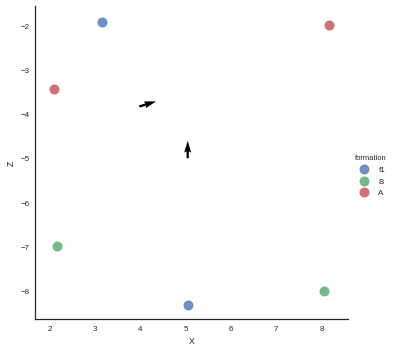

In [3]:
GeMpy.plot_data(geo_data)

In [4]:
geo_data.foliations

,X,Y,Z,azimuth,dip,polarity,formation,series,order_series,G_x,G_y,G_z
0,3.980732,5.012474,-3.832,90.0,72.897,1,f1,Default serie,1,0.955778,5.852450e-17,0.29409
1,5.047732,5.012474,-5.000,90.0,0.000,1,A,Default serie,1,0.000000,0.000000e+00,1.00000


In [5]:
GeMpy.set_data_series(geo_data, {'series': ('A', 'B'),
                      'fault1': 'f1'}, order_series = ['fault1', 'series'])

#geo_data = GeMpy.select_series(geo_data, ['fault1'])
#GeMpy.plot_data(geo_data)
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=[#'solve_kriging',
                                           #  'matrices_shapes',
                                     #         'faults block',
                                      #   'grid_val'
                                         "potential_field_at_interfaces",
                                      #   "potential_field_at_all",
                                         'n_formation',
                                          #   'faults_contribution',
                                             'faults_matrix'
                                     ])

[2, 2]


In [6]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
# Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[0, 3])

# Compile the theano function.
compiled_f = theano.function(input_data_T,
                             data_interp.interpolator.tg.whole_block_model(1,
                                compute_pf=1),
                             allow_input_downcast=True, profile=True)

[0, 3]
n_formation_fault __str__ = [1]
n_formation_series __str__ = [2 3]


In [7]:
np.arange(10)[-6:-0]

array([], dtype=int64)

In [8]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
data_interp.interpolator.tg.len_series_i.get_value()[-1]

3

In [10]:
sol = compiled_f(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Faults interfaces matrix rest __str__ = []
len points __str__ = 3
Faults interfaces matrix ref __str__ = []
Faults interfaces matrix __str__ = []
Value of the potential field at the interfaces __str__ = [-0.024599  0.167259  0.36567 ]
n_formation_fault __str__ = [1]
Faults interfaces matrix rest __str__ = [[1 1]]
len points __str__ = 3
Faults interfaces matrix ref __str__ = [[0 0]]
Faults interfaces matrix __str__ = [[1 1]]
Value of the potential field at the interfaces __str__ = [ 0.372115  0.518623  1.133625]
n_formation_series __str__ = [2 3]


In [11]:
sol.shape

(1, 2, 125000)

In [ ]:
input_data_P


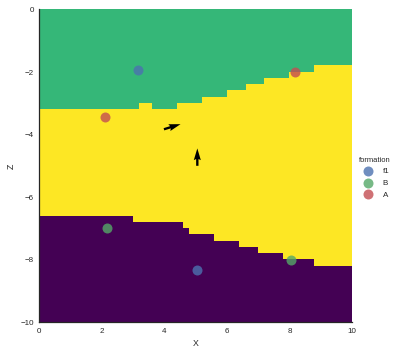

In [12]:
GeMpy.plot_section(geo_data, 25, block=sol[0,0, :], direction='y', plot_data=True)


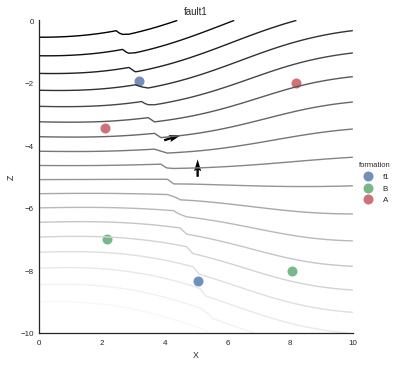

In [13]:

GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25)